<a href="https://colab.research.google.com/github/selfmaded/python_study/blob/master/ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SVM 알고리즘**


**패키지 및 데이터 셋 추가**

In [ ]:
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split # sklearn의 train_test_split을 사용하면 라인 한줄로 손쉽게 데이터를 나눌 수 있음
from sklearn.svm import SVC 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv")   # 데이터셋 로드
print(df.head()) # df의 상위 5개 데이터 출력

train, test = train_test_split(df, test_size=0.2) # 다듬어진 데이터에서 20%를 테스트 데이터로 분류

#print(train.shape[0])# 학습 데이터의 갯수 확인
#print(test.shape[0])# 테스트 데이터의 갯수 확인

           Player Pos   3P   2P  TRB  AST  STL  BLK
0    Alex Abrines  SG  1.4  0.6  1.3  0.6  0.5  0.1
1    Steven Adams   C  0.0  4.7  7.7  1.1  1.1  1.0
2   Alexis Ajinca   C  0.0  2.3  4.5  0.3  0.5  0.6
3  Chris Andersen   C  0.0  0.8  2.6  0.4  0.4  0.6
4     Will Barton  SG  1.5  3.5  4.3  3.4  0.8  0.5


**최적의 SVM 파라미터 찾기**

In [ ]:
def svc_param_selection(X, y, nfolds):  # 사이킷런에서 제공하는 GridSearchCV를 사용해 최적의 파라미터를 구함
  svm_parameters = [{'kernel': ['rbf'], # svm_parameters 선언
                     'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
                     'C': [0.01, 0.1, 1, 10, 100, 1000]}]
  clf = GridSearchCV(SVC(), svm_parameters, cv=nfolds)  # GridSearch에 들어갈 model(SVC)과 파라미터(svm_parameters), cv_fold(10) 설정하여 선언
  clf.fit(X, y)  #  GridSearch를 통해 입력데이터와 정답 데이터에 맞는 parameter를 찾아 학습
  print(clf.best_params_) # 최적의 파라미터를 출력
  return clf # 최적의 파라미터로 학습된 모델을 반환

# 3점슛과 블로킹 횟수를 학습 데이터로 사용 
X_train = train[['3P', 'BLK']]
#print(X_train)

# 농구선수 포지션을 예측값으로 선정
y_train = train[['Pos']]
#print(y_train)

# 최적의 파라미터로 학습된 모델을 clf로 저장
clf = svc_param_selection(X_train, y_train.values.ravel(), 10)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


**결정 경계선 시각화**

In [ ]:
# 시각화할 비용 후보들을 저장
C_canditates = []  # C_candidates 선언 및 초기화
C_canditates.append(clf.best_params_['C'] * 0.01) # C_candidates에 clf best 파라미터 C에 0.01을 곱한 값을 추가
C_canditates.append(clf.best_params_['C'])  # C_candidates에 clf best 파라미터 C를 추가
C_canditates.append(clf.best_params_['C'] * 100) # C_candidates에 clf best 파라미터 C에 100을 곱한 값을 추가
#print(C_canditates)

# 시각화할 감마 후보들을 저장
gamma_candidates = [] # gamma_candidates 선언 및 초기화
gamma_candidates.append(clf.best_params_['gamma'] * 0.01) # gamma_candidates에 clf best 파라미터 gamma에 0.01을 곱한 값을 추가
gamma_candidates.append(clf.best_params_['gamma']) # gamma_candidates에 clf best 파라미터 gamma를 추가
gamma_candidates.append(clf.best_params_['gamma'] * 100) # gamma_candidates에 clf best 파라미터 gamma에 100을 곱한 값을 추가
#print(gamma_candidates)

# 3점슛과 블로킹 횟수로 학습
X = train[['3P', 'BLK']] # train에서 3P와 BLK에 해당하는 데이터를 X에 대입
#print(X)
# 농구선수 포지션을 학습 모델의 분류값으로 사용
Y = train['Pos'].tolist() # train에서 Pos데이터에 해당하는 데이터를 list로 변환하여 Y에 대입
#print(Y)
# 시각화를 위해 센터(C)와 슈팅가드(SG)를 숫자로 표현

position = []  # position 선언 및 초기화
for gt in Y: # Y 리스트 안에 있는 값을 하나씩 gt에 대입하며 반복
  if gt == 'C': # gt가 C이면 0을 position에 추가
    position.append(0)
  else: # gt가 C가 아니면 1을 position에 추가
    position.append(1) 

classifiers = [] # classifiers 선언 및 초기화

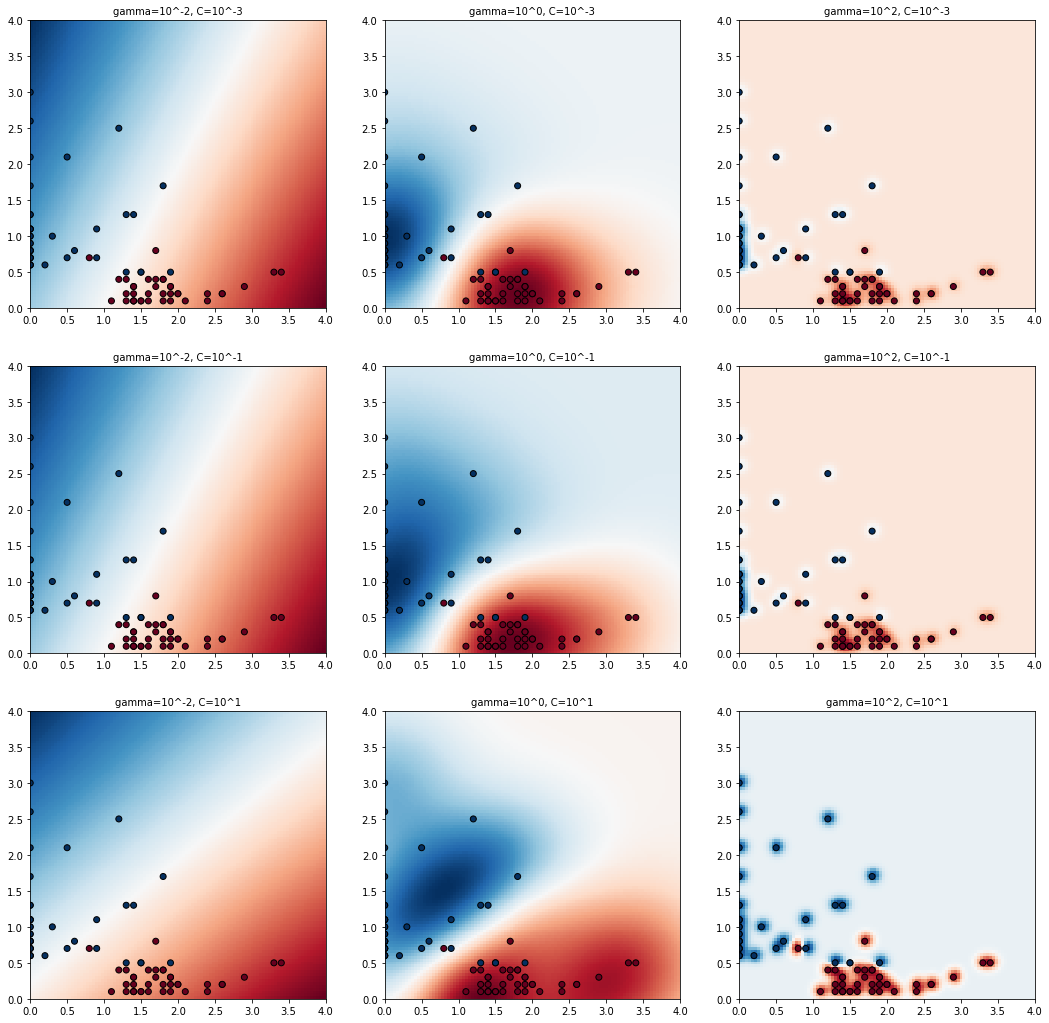

In [ ]:
# 파라미터 후보들을 조합해서 학습된 모델들을 저장
for C in C_canditates: # C_candidates 값을 하나씩 C에 대입하면서 반복
  for gamma in gamma_candidates: # gamma_candidates 값을 하나씩 gamma에 대입하면서 반복
      clf = SVC(C=C, gamma=gamma) # C와 gamma를 파라미터로 지정한 SVC 선언
      clf.fit(X, Y) # 입력 데이터(X), 정답 데이터(Y) 데이터로 학습
      classifiers.append((C, gamma, clf)) # 파라미터 C, gamma, 학습된 모델을 classifiers에 추가
#print(classifiers)
# 각 모델을 시각화
plt.figure(figsize=(18, 18)) # 18, 18 크기의 figure 생성
xx, yy = np.meshgrid(np.linspace(0, 4, 100), np.linspace(0, 4, 100)) # 0~4 사이의 100개의 수열을 x축 기준, y축 기준으로 생성

for (k, (C, gamma, clf)) in enumerate(classifiers):
  Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) # decision function 생성 [xx+yy]
  Z = Z.reshape(xx.shape) # decision function reshape [xx,yy]

  plt.subplot(len(C_canditates), len(gamma_candidates), k + 1) # [C_candidates, gamma_candidates] 크기의 k+1 번째 subplot 생성
  plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)), size='medium') # 그래프 제목 설정, size는 medium

  plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu) # [xx,yy,-Z]의 pcolormesh 생성, cmap(colormap)은 red, blue로 설정
  plt.scatter(X['3P'], X['BLK'], c=position, cmap=plt.cm.RdBu_r, edgecolors='k') # scatter 그래프 생성 (X['3P'], X['BLK']), c(color)는 position(0,1)로 설정, cmap(colormap)은 red, blue로 설정, edgecolor는 k(검정)

**모델 테스트**

In [ ]:
X_test = test[['3P', 'BLK']] # test에서 3P와 BLK에 해당하는 데이터를 X_test에 대입
y_test = test[['Pos']] # test에서 Pos에 해당하는 데이터를 y_test에 대입

# 최적의 파라미터로 학습된 모델로 테스트를 진행
y_true, y_pred = y_test, clf.predict(X_test) # y_test는 y_true에 대입하고, X_pred에는 clf에 X_test를 입력으로 넣어서 예측된 값을 대입

print(classification_report(y_true, y_pred)) # classification_report 함수를 통해 정답과 예측된 값 결과 비교 리포트 출력
print() # 한 줄 띄우기
print("accuracy : "+ str(accuracy_score(y_true, y_pred)) ) # accuracy_score 함수를 통해 정확도 수치 출력

              precision    recall  f1-score   support

           C       0.82      1.00      0.90         9
          SG       1.00      0.82      0.90        11

    accuracy                           0.90        20
   macro avg       0.91      0.91      0.90        20
weighted avg       0.92      0.90      0.90        20


accuracy : 0.9


**실제 예측값 확인하기**

In [ ]:
comparison = pd.DataFrame({'prediction': y_pred, 
                           'ground_truth': y_true.values.ravel()}) # 예측값과 정답을 padnas dataframe으로 만들어 출력
comparison

,prediction,ground_truth
0,C,C
1,SG,SG
2,SG,SG
3,SG,SG
4,SG,SG
5,C,C
6,C,C
7,C,C
8,SG,SG
9,SG,SG
